# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [23]:
# Fetch current BTC price
import json

response_data_btc = requests.get(btc_url).json()
#print(json.dumps(response_data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()
#print(json.dumps(response_data_eth, indent=4))

# Compute current value of my crpto
my_btc_value = (response_data_btc['data']['1']['quotes']['USD']['price']) * my_btc
my_eth_value = (response_data_eth['data']['1027']['quotes']['USD']['price']) * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27619.20
The current value of your 5.3 ETH is $8372.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [37]:
# Format current date as ISO format
today = pd.Timestamp("2023-02-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high    low    close   volume   
timestamp                                                            
2023-02-01 05:00:00+00:00  100.19  100.19  99.89  100.135  3922533   

                                                       SPY                  \
                          trade_count        vwap     open    high     low   
timestamp                                                                    
2023-02-01 05:00:00+00:00       20423  100.016015  405.211  406.43  403.76   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-02-01 05:00:00+00:00  404.41  27654234      246349  405.053393

In [38]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.135
Current SPY closing price: $404.41


In [39]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20220.50
The current value of your 200 AGG shares is $20027.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
savings_data = {
   'amount' : {'crypto':crypto,
               'shares':shares
              }
}

df_savings = pd.DataFrame(savings_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35991.451
shares,40247.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

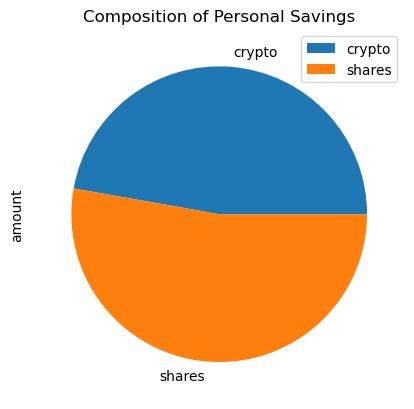

In [48]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [60]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = crypto + shares 

# Validate saving health
if total_amount_savings > emergency_fund:
    print(f'You have more than enough for emergency fund needs.')
elif total_amount_savings == emergency_fund:
    print(f'Congratulations, you reached your emergency fund needs!')
else:
    print(f'You need just {emergency_fund - total_amount_savings} to reach your emergency fund goal.')

You have more than enough for emergency fund needs.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [61]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-02-01', tz='America/New_York').isoformat()

In [63]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-02-01 05:00:00+00:00  107.75  107.8250  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.3450  107.10  107.20   4779312   
2018-02-05 05:00:00+00:00  107.13  107.8100  107.00  107.63   5991756   
2018-02-06 05:00:00+00:00  107.46  107.5600  107.28  107.32   6031378   
2018-02-07 05:00:00+00:00  107.43  107.4369  107.00  107.08   4115631   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-02-01 05:00:00+00:00       26477  107.695566  281.08  283.06  280.68   
2018-02-02 05:00:00+00:00       17781  107.197964  280.08  280.23  275.41   
2018-02-05 05:00:00+00:00       26360  107.347994  273.45  275.85  263.31   
2018-02-06 05:00:00+00:00       24296  107.432203  259.94  269.70  258.70   
2018-02-07 05:00:00+00:00       17410  107.186511  268.50  272.36  267.58   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-02-01 05:00:00+00:00  281.68   90622947      304909  281.766220  
2018-02-02 05:00:00+00:00  275.51  175825647      548623  277.434737  
2018-02-05 05:00:00+00:00  264.11  298863447     1178563  269.869953  
2018-02-06 05:00:00+00:00  269.06  354839027     1527398  264.957106  
2018-02-07 05:00:00+00:00  267.67  169270734      741997  269.593175

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [66]:
# Printing the simulation input data
MC_40_60.portfolio_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-02-01 05:00:00+00:00  107.75  107.8250  107.48  107.52  10330443   
2018-02-02 05:00:00+00:00  107.25  107.3450  107.10  107.20   4779312   
2018-02-05 05:00:00+00:00  107.13  107.8100  107.00  107.63   5991756   
2018-02-06 05:00:00+00:00  107.46  107.5600  107.28  107.32   6031378   
2018-02-07 05:00:00+00:00  107.43  107.4369  107.00  107.08   4115631   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-02-01 05:00:00+00:00       26477  107.695566          NaN  281.08   
2018-02-02 05:00:00+00:00       17781  107.197964    -0.002976  280.08   
2018-02-05 05:00:00+00:00       26360  107.347994     0.004011  273.45   
2018-02-06 05:00:00+00:00       24296  107.432203    -0.002880  259.94   
2018-02-07 05:00:00+00:00       17410  107.186511    -0.002236  268.50   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-02-01 05:00:00+00:00  283.06  280.68  281.68   90622947      304909   
2018-02-02 05:00:00+00:00  280.23  275.41  275.51  175825647      548623   
2018-02-05 05:00:00+00:00  275.85  263.31  264.11  298863447     1178563   
2018-02-06 05:00:00+00:00  269.70  258.70  269.06  354839027     1527398   
2018-02-07 05:00:00+00:00  272.36  267.58  267.67  169270734      741997   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-02-01 05:00:00+00:00  281.766220          NaN  
2018-02-02 05:00:00+00:00  277.434737    -0.021904  
2018-02-05 05:00:00+00:00  269.869953    -0.041378  
2018-02-06 05:00:00+00:00  264.957106     0.018742  
2018-02-07 05:00:00+00:00  269.593175    -0.005166

In [67]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/CelesteT/My work/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998939,0.998724,0.993471,1.001558,1.008732,1.003843,0.995381,0.994073,1.009857,1.006750,...,1.006609,1.000965,1.013632,0.994867,0.999425,0.987777,0.999684,0.994635,1.002731,1.002487
2,1.008437,0.999960,0.995984,0.994614,1.004422,1.017844,0.992969,0.993318,1.002418,1.005756,...,0.986168,1.002200,1.011478,0.987545,0.997153,0.985050,0.990470,0.999018,1.005021,1.007226
3,1.030286,0.997181,0.992265,1.003173,0.998225,1.021898,1.008753,1.003523,1.010579,1.012010,...,0.980726,1.005242,1.022456,0.988927,1.004531,0.989616,1.000187,0.998164,1.011546,1.004136
4,1.027851,0.998996,0.983464,1.008193,1.006038,1.033516,1.011260,1.016808,1.004976,1.014819,...,0.986583,1.006075,1.033623,0.989134,0.992807,0.994522,0.997424,0.995447,1.012724,0.997186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.551898,1.641286,4.028378,4.593398,6.889146,6.188982,2.236919,14.765536,4.349080,9.621959,...,1.220527,5.553797,2.429580,6.262873,1.395660,5.400288,2.176433,2.678359,3.603935,2.813686
7557,2.543610,1.616281,4.011199,4.569307,6.880774,6.145318,2.226103,14.721252,4.354489,9.693236,...,1.205761,5.536479,2.426355,6.362682,1.393697,5.379637,2.183907,2.675680,3.572098,2.791216
7558,2.549913,1.623656,4.064155,4.572743,6.857622,6.190474,2.226456,14.622382,4.383130,9.551730,...,1.214864,5.572286,2.435118,6.397924,1.399631,5.382563,2.158325,2.669648,3.601613,2.777228
7559,2.537637,1.634273,4.072776,4.547709,6.796295,6.192448,2.206984,14.296093,4.345309,9.418516,...,1.211914,5.605733,2.461465,6.416885,1.404915,5.415805,2.140004,2.685936,3.579403,2.787471


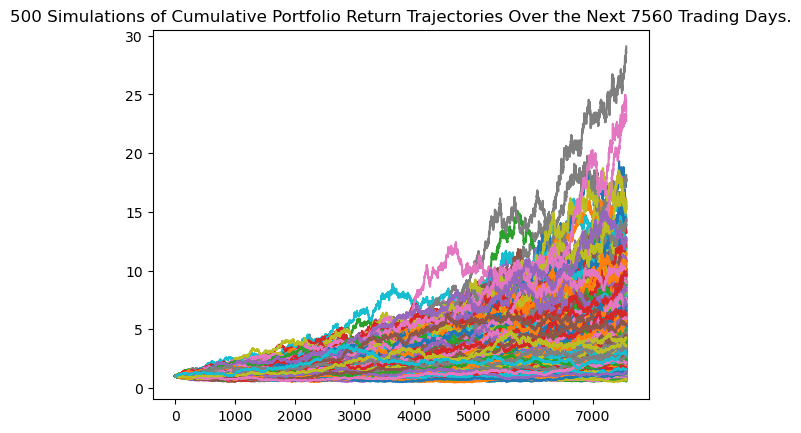

In [68]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

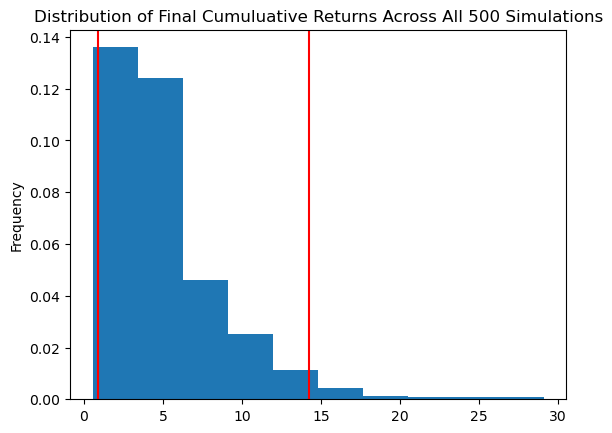

In [69]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

### Retirement Analysis

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.030195
std               3.653415
min               0.559073
25%               2.481433
50%               4.092308
75%               6.387237
max              29.086917
95% CI Lower      0.905175
95% CI Upper     14.256640
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f'There is a 95% chance that an initial investment of ${initial_investment} in the portfolio'
      f' over the next 30 years will end within in the lower range of ${ci_lower} and the upper range of ${ci_upper}')

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the lower range of $18103.49 and the upper range of $285132.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [80]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the lower range of"
      f" ${ci_lower} and the upper range of${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the lower range of $27155.24 and the upper range of$427699.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with 20% Bonds and 80% Stocks
MC_20_80_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [98]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_20_80_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/CelesteT/My work/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994978,1.000463,1.011909,1.010596,1.006203,0.994111,1.000847,1.012740,0.992969,1.006777,...,1.002183,1.009114,1.020646,1.014134,0.986878,1.033086,1.002840,1.017212,0.993393,1.001243
2,0.989292,1.003327,1.022198,0.992299,1.002635,0.969750,1.002503,1.004204,0.994691,1.000906,...,0.996521,1.020388,1.030780,1.023269,0.998093,1.039904,1.012417,0.976917,0.987174,1.002274
3,0.997154,1.030153,1.019924,1.017452,1.001117,0.958730,1.003047,0.996126,1.014293,1.018393,...,1.000238,1.008660,1.035074,1.033274,0.985143,1.021001,0.996251,0.980602,0.997321,1.002152
4,0.984098,1.035675,1.029632,1.036091,0.998157,0.951557,1.005225,1.013019,1.026771,1.025865,...,0.999126,1.014924,1.021638,1.020646,0.985502,1.003215,0.992219,0.987195,0.987787,0.991433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.841413,1.214908,1.288693,3.063739,1.363117,1.384696,1.278687,0.832214,1.207587,1.634528,...,0.871714,1.147265,2.360915,1.274782,1.755252,1.879627,2.326577,1.104048,1.635424,1.702405
1257,0.847592,1.225974,1.286131,3.044556,1.367598,1.374037,1.260592,0.829770,1.198567,1.643388,...,0.866078,1.132120,2.356692,1.244986,1.752494,1.854399,2.299103,1.094766,1.649498,1.697892
1258,0.844680,1.225931,1.278175,3.050419,1.344657,1.365962,1.267284,0.827271,1.202060,1.644789,...,0.879166,1.128566,2.352427,1.260645,1.722341,1.860288,2.267240,1.106542,1.653729,1.697625
1259,0.823869,1.220509,1.263989,3.072245,1.342120,1.367197,1.288559,0.824386,1.207222,1.653854,...,0.881142,1.095893,2.345107,1.275729,1.714874,1.860585,2.263321,1.109211,1.647107,1.700682


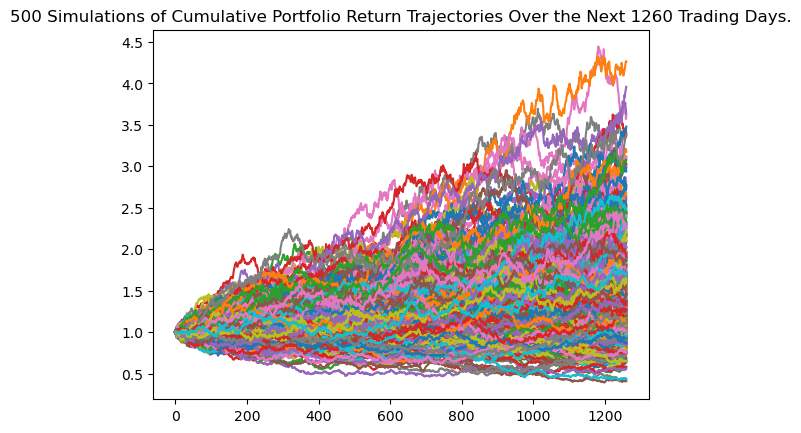

In [99]:
# Plot simulation outcomes
line_plot_5 = MC_20_80_five.plot_simulation()

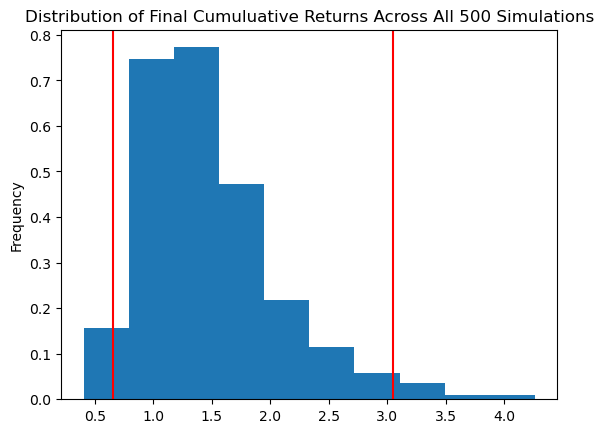

In [100]:
# Plot probability distribution and confidence intervals
dist_plot_5 = MC_20_80_five.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_20_80_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.481460
std               0.597573
min               0.407113
25%               1.070669
50%               1.355785
75%               1.764313
max               4.263962
95% CI Lower      0.658858
95% CI Upper      3.052860
Name: 1260, dtype: float64


In [102]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5[8]*initial_investment,2)
ci_upper_five = round(tbl_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}.")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $39531.45 and $183171.59.


### Ten Years Retirement Option

In [103]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_20_80_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [104]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_20_80_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/CelesteT/My work/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993118,1.011512,1.018726,0.997931,1.002853,0.989920,0.995437,1.005732,0.997141,0.995954,...,0.976531,1.003970,0.990706,0.998674,0.990466,1.001908,0.984347,0.997241,1.010404,0.982120
2,0.986612,1.015367,1.035091,1.000969,0.989707,0.997042,0.992591,1.009786,0.991196,0.993808,...,0.978206,0.990224,0.988782,0.990990,0.986746,0.988266,0.989355,0.994272,0.992111,0.968220
3,0.984016,1.016157,1.009302,0.994213,0.997422,0.997511,1.006205,0.997902,0.995976,0.989743,...,0.980081,1.002280,0.986390,0.992163,0.983124,0.979206,0.968949,0.986608,0.984662,0.962193
4,0.978538,1.015798,1.002381,1.007807,0.994290,0.997155,1.024237,0.997249,1.004142,0.989697,...,0.990355,1.005073,0.968277,1.004994,0.993202,0.989071,0.984493,1.011476,0.982572,0.948887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.134578,2.696764,1.079596,1.372681,1.178711,2.346041,2.636348,0.943913,1.139828,2.261513,...,2.106197,0.899333,1.378057,1.384492,1.185031,0.667039,1.763285,2.120936,2.794766,1.979826
2517,2.156384,2.686358,1.073274,1.367182,1.186503,2.362649,2.652219,0.935097,1.123562,2.277378,...,2.128548,0.924589,1.368950,1.390464,1.180029,0.659890,1.758862,2.075823,2.799651,1.966442
2518,2.126536,2.712458,1.103662,1.366417,1.202000,2.352576,2.712512,0.945584,1.130477,2.287438,...,2.137711,0.919826,1.372160,1.359854,1.184169,0.655369,1.749681,2.054578,2.824483,1.971563
2519,2.095344,2.711623,1.106002,1.367861,1.217711,2.363560,2.711835,0.948611,1.133022,2.266158,...,2.134129,0.905323,1.378899,1.343223,1.175361,0.651682,1.765786,2.048354,2.854830,1.963092


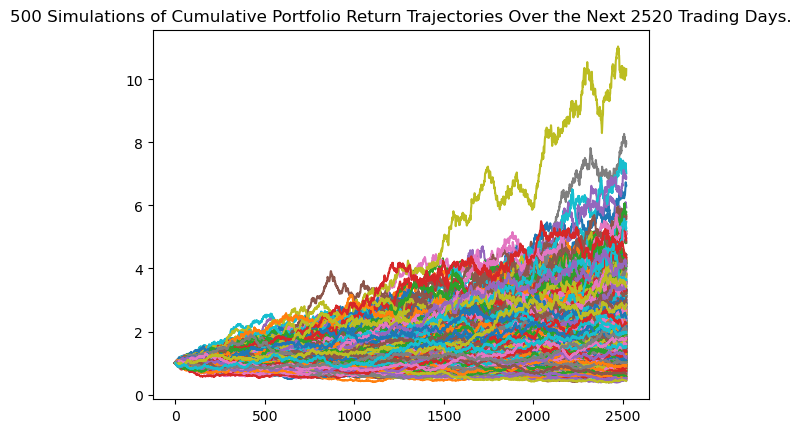

In [105]:
# Plot simulation outcomes
line_plot_ten = MC_20_80_ten.plot_simulation()

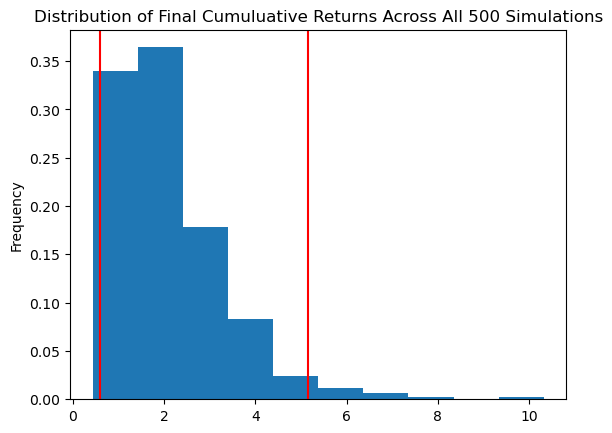

In [106]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_20_80_ten.plot_distribution()

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10 = MC_20_80_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              2.117259
std               1.243059
min               0.436760
25%               1.264505
50%               1.799810
75%               2.681088
max              10.319225
95% CI Lower      0.589208
95% CI Upper      5.158337
Name: 2520, dtype: float64


In [108]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10[8]*initial_investment,2)
ci_upper_ten = round(tbl_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the lower range of"
      f" ${ci_lower_ten} and the upper range of ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the lower range of $35352.48 and the upper range of $309500.2
